# Visualization Code for the entire maze


In [1]:
import numpy as np
from matplotlib import rcParams
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter
from IPython.display import HTML

class visualization:
    def __init__(self, S, F):
        '''
          Η μέθοδος αυτή αρχικοποιεί ένα αντικείμενο τύπου visualization.
          Είσοδος: 
          -> S: το σημείο εκκίνσης της αναζήτησης
          -> F: το σημείο τερματισμού
        '''
        self.S = S
        self.F = F
        self.images = []
    
    def draw_step(self, grid, frontier, expanded_nodes):
        '''
          Η συνάρτηση αυτή καλείται για να σχεδιαστεί ένα frame στο animation (πρακτικά έπειτα από την επέκταση κάθε κόμβου)
          Είσοδος: 
          -> grid: Ένα χάρτης τύπου grid
          -> frontier: Μια λίστα με τους κόμβους που ανήκουν στο μέτωπο της αναζήτησης
          -> expanded_nodes: Μια λίστα με τους κόμβους που έχουν ήδη επεκταθεί
          Επιστρέφει: None
          Η συνάρτηση αυτή πρέπει να καλεστεί τουλάχιστον μια φορά για να μπορέσει να σχεδιαστει ένα animation (πρεπεί το animation να έχει τουλάχιστον ένα frame).
        '''
        image = np.zeros((grid.N, grid.N, 3), dtype=int)
        image[grid.grid == 0] = [255, 255, 255]
        image[grid.grid == 1] = [0, 0, 0]
        
        for node in frontier:
            image[node] = [0, 225, 0]
            
        for node in expanded_nodes:
            image[node] = [0, 0, 128]

        image[self.S] = [50, 168, 64]
        image[self.F] = [168, 50, 50]
        self.images.append(image)
    
    def add_path(self, path):
        '''
          Η συνάρτηση αυτή προσθέτει στο τελευταίο frame το βέλτιστο μονοπάτι.
          Είσοδος:
          -> path: Μια λίστα η όποια περιέχει το βέλτιστο μονοπάτι (η οποία πρέπει να περιέχει και τον κόμβο αρχή και τον κόμβο στόχο)
          Έξοδος: None
        '''
        for n in path[1:-1]:
            image = np.copy(self.images[-1])
            image[n] = [66, 221, 245]
            self.images.append(image)
        for _ in range (100):
            self.images.append(image)
        
    def create_gif(self, fps = 30, repeat_delay = 2000):
        if len(self.images) == 0:
            raise EmptyStackOfImages("Error! You have to call 'draw_step' at  first.")
        fig = plt.figure()
        plt.axis('off')
        ims = []
        for img in self.images:
            img = plt.imshow(img)
            ims.append([img])
        ani = animation.ArtistAnimation(fig, ims, interval=1000//fps, blit=True, repeat_delay= repeat_delay)
        plt.close(fig)
        return ani
        
    def save_gif(self, filename, fps = 30):
        '''
            Η συνάρτηση αυτή ξαναδημιουργεί και αποθηκεύει το animation σε ένα αρχείο.
            Είσοδος:
            -> Το όνομα του αρχείου με κατάληξη .gif
            Έξοδος: (None)
        '''
        ani = self.create_gif(fps)
        writer = PillowWriter(fps= fps)
        ani.save(filename, writer=writer)

    def show_gif(self, fps= 30, repeat_delay = 2000):
        '''
            Η συνάρτηση αυτή εμφανίζει inline το animation.
            Είσοδος:
            -> fps: τα frames per second
            Έξοδος: Το αντικείμενο που παίζει το animation
            Exceptions: EmptyStackOfImages αν το animation δεν έχει ούτε ένα frame, δηλαδή αν η draw_step δεν έχει καλεστεί ποτέ.
        '''
        ani = self.create_gif(fps, repeat_delay)
        # return HTML(ani.to_html5_video())
        return HTML(ani.to_jshtml())

    def show_last_frame(self):
        '''
            Η μέθοδος αυτή εμφανίζει inline το τελευταίο frame που έχει δημιουργήθει.
            Είσοδος:
            Έξοδος: Το αντικείμενο που εμφανίζει την εικόνα.
            Exceptions: EmptyStackOfImages αν το animation δεν έχει ούτε ένα frame, δηλαδή αν η draw_step δεν έχει καλεστεί ποτέ.
        '''
        if len(self.images) == 0:
            raise EmptyStackOfImages("Error! You have to call 'draw_step' at  first.")
        else:
            plt.imshow(self.images[-1])


class EmptyStackOfImages(Exception):
    pass

# Randomized Maze creation


In [2]:
%matplotlib inline
from matplotlib import rcParams
import numpy as np
from queue import LifoQueue
from random import shuffle, uniform, choice, triangular, betavariate
import matplotlib.pyplot as plt
rcParams['animation.embed_limit'] = 2**128

class grid:
    def __init__(self, N, S, F):
        
        ## Make sure start and end are within the grid
        assert N > 2
        assert S[0] < N
        assert S[1] < N
        assert F[0] < N
        assert F[1] < N

        assert S[0] > 0
        assert S[1] > 0
        assert F[0] > 0
        assert F[1] > 0

        self.N = N
        
        ## Initialize grid with obstacles
        self.grid = np.ones((N, N), dtype=np.int32)
        
        ## Start and end position have no obstacles
        self.grid[S]=0
        self.grid[F]=1
        obstacle_free_points = {S, F}
        ### YOUR CODE HERE
        
    def add_walls(self, S, walls):
        if S[0] > 0 and self.grid[(S[0] - 1, S[1])]:
            walls.append((S[0] - 1, S[1]))
        if S[1] > 0 and self.grid[(S[0], S[1] - 1)]:
            walls.append((S[0], S[1] - 1))
        if S[0] + 1 < self.N and self.grid[(S[0] + 1, S[1])]:
            walls.append((S[0] + 1, S[1]))
        if S[1] + 1 < self.N and self.grid[(S[0], S[1] + 1)]:
            walls.append((S[0], S[1] + 1))
      
    def check_neighbors(self, S, walls):
        x, y = S
        if x + 1 < N and x > 0 and not self.grid[(x+1, y)] and self.grid[(x-1, y)]: # remove the intermediate wall
            self.grid[S] = 0
            self.grid[(x-1,y)] = 0
            self.add_walls((x-1,y), walls)
        elif x + 1 < N and x > 0 and self.grid[(x+1, y)] and not self.grid[(x-1, y)]: # remove the intermediate wall
            self.grid[S] = 0
            self.grid[(x+1,y)] = 0
            self.add_walls((x+1,y), walls)
        if y + 1 < N and y > 0 and not self.grid[(x, y+1)] and self.grid[(x, y-1)]: # remove the intermediate wall
            self.grid[S] = 0
            self.grid[(x,y-1)] = 0
            self.add_walls((x,y-1), walls)
        elif y + 1 < N and y > 0 and self.grid[(x, y+1)] and not self.grid[(x, y-1)]: # remove the intermediate wall
            self.grid[S] = 0
            self.grid[(x,y+1)] = 0
            self.add_walls((x,y+1), walls)
            
    def populate_map(self, S, F):
        N = self.N
        walls = []
        self.add_walls(S, walls)
        
        while walls:
            w = choice(walls)
            walls.remove(w)
            x, y = w
            self.check_neighbors(w, walls)
            
        self.grid[F] = 0

    def draw_map(self, S=None, F=None, path=None):
        image = np.zeros((self.N, self.N, 3), dtype=int)
        image[self.grid == 0] = [255, 255, 255]
        image[self.grid == 1] = [0, 0, 0]
        if S:
            image[S] = [50, 168, 64]
        if F:
            image[F] = [168, 50, 50]
        if path:
            for n in path[1:-1]:
                image[n] = [66, 221, 245]

        plt.imshow(image)
        plt.xticks([])
        plt.yticks([])
        plt.show()

# Random creation of a set of mazes

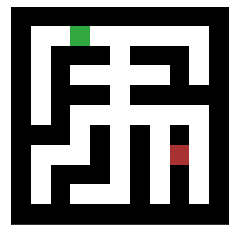

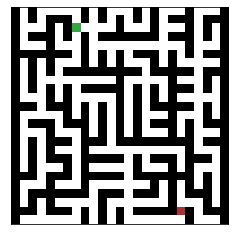

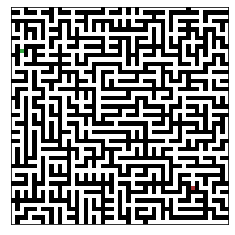

In [3]:
for N, S, F in (11, (1, 3), (7, 8)), (25, (2, 7), (23, 19)), (51, (10, 2), (42, 42)):
    map = grid(N, S, F)
    map.populate_map(S, F)
    map.draw_map(S, F)

# Implementation of Pathfinding functions

The pathfinder function gets two arguments(c, h), denoted for cost function and heuristic function respectively.
This generalization gives us the ability to test different heuristic and cost functions in a pseudo A* algorithm package to fairly analyze complexity and speed of given functions

In [4]:
# from visualization import *

class pathfinder:
    def __init__(self, S, F, grid, c, h):
        self.S = S
        self.F = F
        self.grid = grid
        self.cost = c
        self.heuristic = h
        #for visualization 
        self.vis = visualization(S, F)
        self.path=[]
            
    def neighbors(self, node):
        neighbors = []
        x, y = node
        if x > 0 and not self.grid.grid[x-1][y]:
            neighbors.append((x - 1, y))
        if y > 0 and not self.grid.grid[x][y-1]:
            neighbors.append((x, y - 1))
        if x + 1 < self.grid.N and not self.grid.grid[x+1][y]:
            neighbors.append((x + 1, y))
        if y + 1 < self.grid.N and not self.grid.grid[x][y+1]:
            neighbors.append((x, y + 1))
        return neighbors
        
    def find_euclidean(self, node):
        """
        Find the euclidean distance from the goal for the given heuristic cost for every square
        """
        x, y = node
        xF, yF = self.F
        return  np.sqrt((self.heuristic(x,xF) * (x - xF))**2 + (self.heuristic(y,yF) * (y-yF))**2)   
    
    def find_manhattan(self, node):
        """
        Find the manhattan distance from the goal for the given heuristic cost for every square
        """
        x, y = node
        xF, yF = self.F
        return self.heuristic(x,y) * (abs(x - xF) + abs(y - yF))

    def find_diagonal(self, node):
        D = D2 = 1
        x,y = node
        xF, yF = self.F
        dx = abs(x - xF) * self.heuristic(x, xF)
        dy = abs(y - yF) * self.heuristic(y, yF)
        return D * (dx + dy) + (D2 - 2 * D) * min(dx, dy)     
        
    def reconstruct_path(self, parent, goal):
        self.path.append(goal)
        while goal != self.S:
            goal = parent[goal]
            self.path.append(goal)
    
    
    def find_path(self, func = 1):
        """
        Simple pathfinding algorithm implementation. 
        For func = 1 manhattan is used as heuristic 
        and for func = 0 euclidian is used as heuristic
        """
        n = self.S 
        # append starting point to the search frontier
        openSet = [(n,0)]
        
        gScore = {n:0}        
        parent = {}
        closedSet = set()
        frontier = [n] # this is the openSet without the f(n) costs, used just for drawing the steps of the A*

        while openSet:
            openSet.sort(key= lambda x : x[1])
            node, _ = openSet.pop(0)
            
            if node == self.F:
                self.reconstruct_path(parent, node)
                return
            
            closedSet.add(node)
            for i in self.neighbors(node):
                x, y =i
                if func == 1:
                    tentative_score = gScore[node] + self.cost(x,y)
                    cost = tentative_score + self.find_manhattan(i)
                if func == 2:
                    tentative_score = gScore[node] + self.cost(x,y)
                    cost = tentative_score + self.find_diagonal(i)
                else:
                    tentative_score = gScore[node] + self.cost(x,y)
                    cost = tentative_score + self.find_euclidean(i)

                if tentative_score < gScore.get(i,0) or i not in frontier: 
                    gScore[i] = tentative_score 
                    parent[i] = node
                    openSet.append((i, cost))
                    frontier.append(i)

            self.vis.draw_step(self.grid, frontier, closedSet)
                                   
    def get_path(self):
        return self.path



In [5]:
# make and draw the map
N = 100
S = (5, 9)
F = (95, 85)

map = grid(N, S, F)
map.populate_map(S, F)

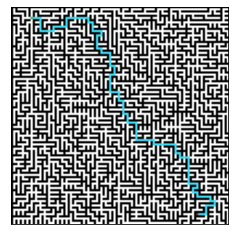

In [6]:
# Best First with Diagonal
pf = pathfinder(S, F, map, lambda x, y: 0, lambda x, y: 1)
pf.find_path(2)
map.draw_map(S, F, pf.get_path())
pf.vis.add_path(pf.get_path())
# pf.vis.show_gif(fps = 60)
# pf.vis.save_gif("Best_First_Diagonal.gif")

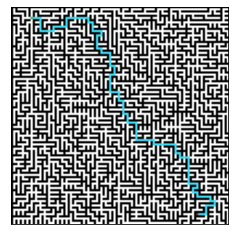

In [7]:
# Best First with Euclidean
pf = pathfinder(S, F, map, lambda x, y: 0, lambda x, y: 1)
pf.find_path(0)
map.draw_map(S, F, pf.get_path())
pf.vis.add_path(pf.get_path())
# pf.vis.show_gif(fps = 60)
# pf.vis.save_gif("Best_First_Euclidean.gif")

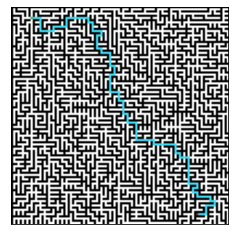

In [8]:
# Best First with Manhattan
pf = pathfinder(S, F, map, lambda x, y: 0, lambda x, y: 1)
pf.find_path(1) 
map.draw_map(S, F, pf.get_path())
pf.vis.add_path(pf.get_path())
# pf.vis.show_gif(fps = 60)
# pf.vis.save_gif("Best_First_Manhattan.gif")

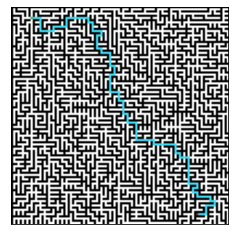

In [9]:
# A* with Euclidean
pf = pathfinder(S, F, map, lambda x, y: 1, lambda x, y: 1)
pf.find_path(0)
map.draw_map(S, F, pf.get_path())
pf.vis.add_path(pf.get_path())
# pf.vis.show_gif(fps = 60)
# pf.vis.save_gif("A*_Euclidean.gif")

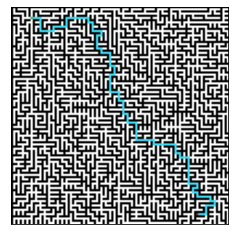

In [10]:
# A* with Manhattan
pf = pathfinder(S, F, map, lambda x, y: 1, lambda x, y: 1)
pf.find_path(1)
map.draw_map(S, F, pf.get_path())
pf.vis.add_path(pf.get_path())
# pf.vis.show_gif(fps = 60)
# pf.vis.save_gif("A*_Manhattan.gif")

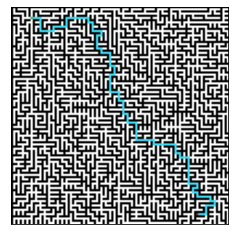

In [11]:
# A* with Diagonal
pf = pathfinder(S, F, map, lambda x, y: 1, lambda x, y: 1)
pf.find_path(2)
map.draw_map(S, F, pf.get_path())
pf.vis.add_path(pf.get_path())
# pf.vis.show_gif(fps = 60)
# pf.vis.save_gif("A*_Diagonal.gif")

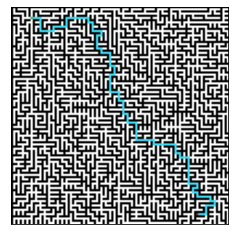

In [12]:
# Dijkstra 
pf = pathfinder(S, F, map, lambda x, y: 1, lambda x, y: 0)
pf.find_path(0)
map.draw_map(S, F, pf.get_path())
pf.vis.add_path(pf.get_path())
# pf.vis.show_gif(fps = 60)
# pf.vis.save_gif("Dijkstra.gif")

# Adding weights to the maze path

In [13]:
## The code for adding weights to the maze cells

class grid:
    def __init__(self, N, S, F, randomDistr):
        ## Make sure start and end are within the grid
        e = 10**(-26)
        if randomDistr == 'Uniform':
            self.distr = lambda: uniform(0 + e, 1 - e)
        elif randomDistr == 'Triangular':
            self.distr = lambda: triangular(0 + e, 1 - e)
        elif randomDistr == 'Beta':
            self.distr = lambda: betavariate(0.5, 0.5)
        
        assert N > 2
        assert S[0] < N
        assert S[1] < N
        assert F[0] < N
        assert F[1] < N

        assert S[0] > 0
        assert S[1] > 0
        assert F[0] > 0
        assert F[1] > 0

        self.N = N
        
        ## Initialize grid with obstacles
        self.grid = np.ones((N, N), dtype=np.int32)
        
        ## Start and end position have no obstacles
        self.grid[S]=0
        self.grid[F]=1
        obstacle_free_points = {S, F}
        
    def add_walls(self, S, walls):
        if S[0] > 0 and self.grid[(S[0] - 1, S[1])]:
            walls.append((S[0] - 1, S[1]))
        if S[1] > 0 and self.grid[(S[0], S[1] - 1)]:
            walls.append((S[0], S[1] - 1))
        if S[0] + 1 < self.N and self.grid[(S[0] + 1, S[1])]:
            walls.append((S[0] + 1, S[1]))
        if S[1] + 1 < self.N and self.grid[(S[0], S[1] + 1)]:
            walls.append((S[0], S[1] + 1))
      
    def check_neighbors(self, S, walls):
        x, y = S
        if x + 1 < N and x > 0 and self.grid[(x+1, y)] < 1 and self.grid[(x-1, y)]: # remove the intermediate wall
            self.grid[S] = self.distr()
            self.grid[(x-1,y)] = 0
            self.add_walls((x-1,y), walls)
        elif x + 1 < N and x > 0 and self.grid[(x+1, y)] and self.grid[(x-1, y)] < 1: # remove the intermediate wall
            self.grid[S] = self.distr()
            self.grid[(x+1,y)] = 0
            self.add_walls((x+1,y), walls)
        if y + 1 < N and y > 0 and self.grid[(x, y+1)] < 1 and self.grid[(x, y-1)]: # remove the intermediate wall
            self.grid[S] = self.distr()
            self.grid[(x,y-1)] = 0
            self.add_walls((x,y-1), walls)
        elif y + 1 < N and y > 0 and self.grid[(x, y+1)] and self.grid[(x, y-1)] < 1: # remove the intermediate wall
            self.grid[S] = self.distr()
            self.grid[(x,y+1)] = 0
            self.add_walls((x,y+1), walls)
            
    def populate_map(self, S, F):
        N = self.N
        walls = []
        self.add_walls(S, walls)
        
        while walls:
            w = choice(walls)
            walls.remove(w)
            x, y = w
            self.check_neighbors(w, walls)
                
        self.grid[F] = 0

    def draw_map(self, S=None, F=None, path=None):
        image = np.zeros((self.N, self.N, 3), dtype=int)
        image[self.grid == 0] = [255, 255, 255]
        image[self.grid == 1] = [0, 0, 0]
        if S:
            image[S] = [50, 168, 64]
        if F:
            image[F] = [168, 50, 50]
        if path:
            for n in path[1:-1]:
                image[n] = [66, 221, 245]

        plt.imshow(image)
        plt.xticks([])
        plt.yticks([])
        plt.show()

    def test(self):
        for _ in range(5):
            print(self.distr())

In [14]:
# Pathfinding according to cell weight

class pathfinder:
    def __init__(self, S, F, grid, c, h):
        self.S = S
        self.F = F
        self.grid = grid
        self.cost = c
        self.heuristic = h
        #for visualization 
        self.vis = visualization(S, F)
        self.path=[]
            
    def neighbors(self, node):
        neighbors = []
        x, y = node
        if x > 0 and not self.grid.grid[x-1][y]:
            neighbors.append((x - 1, y))
        if y > 0 and not self.grid.grid[x][y-1]:
            neighbors.append((x, y - 1))
        if x + 1 < self.grid.N and not self.grid.grid[x+1][y]:
            neighbors.append((x + 1, y))
        if y + 1 < self.grid.N and not self.grid.grid[x][y+1]:
            neighbors.append((x, y + 1))
        return neighbors

    def find_diagonal(self, node):
        D = D2 = 1
        x,y = node
        xF, yF = self.F
        dx = abs(x - xF) * self.heuristic(x, xF)
        dy = abs(y - yF) * self.heuristic(y, yF)
        return D * (dx + dy) + (D2 - 2 * D) * min(dx, dy)
        
    def find_euclidean(self, node):
        """
        Find the euclidean distance from the goal for the given heuristic cost for every square
        """
        x, y = node
        xF, yF = self.F
        return  np.sqrt((self.heuristic(x,xF) * (x - xF))**2 + (self.heuristic(y,yF) * (y-yF))**2)   
    
    def find_manhattan(self, node):
        """
        Find the manhattan distance from the goal for the given heuristic cost for every square
        """
        x, y = node
        xF, yF = self.F
        return self.heuristic(x,y) * (abs(x - xF) + abs(y - yF))
        
        
    def reconstruct_path(self, parent, goal):
        self.path.append(goal)
        while goal != self.S:
            goal = parent[goal]
            self.path.append(goal)
    
    
    def find_path(self, func = 0):
        """
        Simple pathfinding algorithm implementation. 
        For func = 1 manhattan is used as heuristic 
        and for func = 0 euclidian is used as heuristic
        """
        n = self.S 
        # append starting point to the search frontier
        openSet = [(n,0)]
        
        gScore = {n:0}        
        parent = {}
        self.closedSet = set()
        frontier = [n] # this is the openSet without the f(n) costs, used just for drawing the steps of the A*

        while openSet:
            openSet.sort(key= lambda x : x[1])
            node, _ = openSet.pop(0)
            
            if node == self.F:
                self.reconstruct_path(parent, node)
                return
            
            self.closedSet.add(node)
            for i in self.neighbors(node):
                x, y =i
                if func == 1:
                    tentative_score = gScore[node] + self.cost(x,y) * self.grid.grid[x][y] 
                    cost = tentative_score + self.find_manhattan(i)
                elif func == 2:
                    tentative_score = gScore[node] + self.cost(x,y) * self.grid.grid[x][y] 
                    cost = tentative_score + self.find_diagonal(i)
                else:
                    tentative_score = gScore[node] + self.cost(x,y) * self.grid.grid[x][y]
                    cost = tentative_score + self.find_euclidean(i)

                if tentative_score < gScore.get(i,0) or i not in frontier: 
                    gScore[i] = tentative_score 
                    parent[i] = node
                    openSet.append((i, cost))
                    frontier.append(i)

            self.vis.draw_step(self.grid, frontier, self.closedSet)
                                   
    def get_path(self):
        return self.path
    
    def expanded_nodes(self):
        return self.closedSet

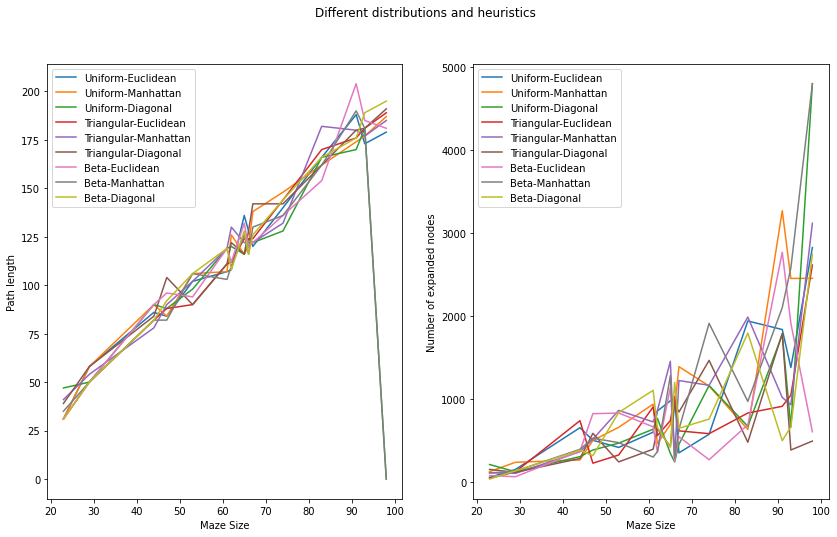

In [15]:
from random import randint
plt.rcParams['figure.figsize'] = [14, 8]

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_xlabel("Maze Size")
ax1.set_ylabel("Path length")
ax2.set_xlabel("Maze Size")
ax2.set_ylabel("Number of expanded nodes")

mazes = []
for _ in range(15):
    N = randint(20, 100)
    S = (randint(1,5), randint(1,5))
    F = (randint(N-10,N-1), randint(N-10,N-1))
    mazes.append((N, S, F)) 
    
mazes.sort(key=lambda x: x[0])

fig.suptitle('Different distributions and heuristics')
for distribution in ['Uniform', 'Triangular', 'Beta']:
    for heuristic in range(3):
        size = []
        path = []
        expanded_nodes = []
#         for N, S, F in (11, (1, 3), (7, 8)), (25, (2, 7), (23, 19)), (51, (10, 2), (42, 42)):
        for N, S, F in mazes:
            map = grid(N, S, F, distribution)
            map.populate_map(S, F)
            pf = pathfinder(S, F, map, lambda x, y: 1, lambda x, y: 1)
            pf.find_path(heuristic)
            size.append(N)
            path.append(len(pf.get_path()))
            expanded_nodes.append(len(pf.expanded_nodes()))
        if heuristic == 1:
            ax1.plot(size,path,  label="{}-Manhattan".format(distribution))
            ax2.plot(size,expanded_nodes,label="{}-Manhattan".format(distribution))
        elif heuristic == 2:
            ax1.plot(size,path,  label="{}-Diagonal".format(distribution))
            ax2.plot(size,expanded_nodes,label="{}-Diagonal".format(distribution))
        else:
            ax1.plot(size,path,  label="{}-Euclidean".format(distribution))
            ax2.plot(size,expanded_nodes,label="{}-Euclidean".format(distribution))
ax1.legend()
ax2.legend()
plt.show()

# Final Analysis

To analyze the algorithms, three random distributions were chosen to test all the given pathfinding algorithms. Every maze cell gets initialized with a random value between [0,1]. This process was used to further simulate real world data, where the path cost of a possible step isn't necessarily known to us, before we traverse the given path. However, this in return doesn't allow A* to always find the best path, due to overestimation of the cost to the goal by the heuristic function. This however provides some data that can help us determine a better heuristic function (the one that finds a shortest path). 

## Further conclusions

In general the variation in path length of all the algorithms is minimal, primarily because the same algorithm model is used. The difference in time complexity is given by the number of the expanded nodes. The lowest number of expanded nodes, is the fastest function. Due to variation results pointing to a clear winner cannot be defined and performance really varies between runs. The euclidean heuristic seems to be a bit more accurate without compromises in the time department.

A 'fairer' comparison might be provided by altering the random distribution functions to be between [1,2], so that no overestimation can happen, in order for the algorithms to always find the shortest path.